In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.animation as animation
import datetime
import seaborn as sns
import missingno as msno
import firebase_admin
from firebase_admin import credentials, db
from datetime import datetime  # Untuk konversi timestamp ke human-readable
sns.set_theme(style="whitegrid")
%matplotlib inline 

In [2]:
# Konfigurasi database sumber
source_cred = credentials.Certificate("D:/staklimjerukagung-firebase-adminsdk-kcfma-e091165a9b.json")
firebase_admin.initialize_app(source_cred, {
    'databaseURL': 'https://staklimjerukagung-default-rtdb.asia-southeast1.firebasedatabase.app/'
})

In [18]:
# Input readable date
start_readable_date = "01-05-2025 00:00:00"  # Format: DD-MM-YYYY HH:MM:SS
end_readable_date = "31-05-2025 23:59:59"  # Format: DD-MM-YYYY HH:MM:SS

# Convert readable date to Unix timestamp
start_timestamp = int(datetime.strptime(start_readable_date, "%d-%m-%Y %H:%M:%S").timestamp())
print(start_timestamp) # Convert to string and print
end_timestamp = int(datetime.strptime(end_readable_date, "%d-%m-%Y %H:%M:%S").timestamp())
print(end_timestamp) # Convert to string and print


1746032400
1748710799


In [19]:
# Refer ke path data
ref_data1 = db.reference('/auto_weather_stat/id-03/data')
ref_data2 = db.reference('/auto_weather_stat/id-05/data')

# Ambil data yang key-nya berada dalam rentang waktu yang ditentukan
query_data1 = ref_data1.order_by_key().start_at(str(start_timestamp)).end_at(str(end_timestamp))
query_data2 = ref_data2.order_by_key().start_at(str(start_timestamp)).end_at(str(end_timestamp))

# Ambil hasil
results_data1 = query_data1.get()
results_data2 = query_data2.get()

In [20]:
# Mengubah data menjadi DataFrame pandas untuk data pertama
if results_data1:
    cuaca1 = pd.DataFrame.from_dict(results_data1, orient='index')
    
    # Jika 'timestamp' sudah ada, jangan pindahkan indeks ke kolom
    if 'timestamp' not in cuaca1.columns:
        cuaca1.index.name = 'timestamp'  # Mengatur nama indeks
        cuaca1.reset_index(inplace=True)  # Memindahkan indeks menjadi kolom biasa
    
    print("Data dari sumber pertama:")
    print(cuaca1.head())  # Menampilkan data untuk verifikasi
else:
    print("Tidak ada data dari sumber pertama")

# Mengubah data menjadi DataFrame pandas untuk data kedua
if results_data2:
    cuaca2 = pd.DataFrame.from_dict(results_data2, orient='index')
    
    # Jika 'timestamp' sudah ada, jangan pindahkan indeks ke kolom
    if 'timestamp' not in cuaca2.columns:
        cuaca2.index.name = 'timestamp'  # Mengatur nama indeks
        cuaca2.reset_index(inplace=True)  # Memindahkan indeks menjadi kolom biasa
    
    print("Data dari sumber kedua:")
    print(cuaca2.head())  # Menampilkan data untuk verifikasi
else:
    print("Tidak ada data dari sumber kedua")

Data dari sumber pertama:
                 dew  humidity  pressure  temperature   timestamp  volt
1746032409  25.14952     95.02   1010.70        26.01  1746032409  4.11
1746032469  25.13251     94.98   1010.66        26.00  1746032469  4.11
1746032529  25.12081     94.97   1010.65        25.99  1746032529  4.11
1746032589  25.11551     94.94   1010.64        25.99  1746032589  4.11
1746032649  25.08503     94.88   1010.66        25.97  1746032649  4.11
Data dari sumber kedua:
                 dew  humidity  pressure  rainfall  rainrate  temperature  \
1746032436  25.15701  93.87221  1011.989       0.0       0.0     26.22568   
1746032496  25.17367  94.00954  1011.983       0.0       0.0     26.21767   
1746032556  25.16965  94.00191  1011.967       0.0       0.0     26.21500   
1746032616  25.13505  93.91226  1011.950       0.0       0.0     26.19630   
1746032676  25.14932  93.91798  1011.966       0.0       0.0     26.20966   

             timestamp     volt  
1746032436  174603243

In [21]:
cuaca1.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt
1748710195,25.40647,97.46,1013.11,25.84,1748710195,4.12
1748710255,25.40341,97.50,1013.03,25.83,1748710255,4.12
1748710315,25.44366,97.56,1013.06,25.86,1748710315,4.11
1748710375,25.38422,97.62,1013.08,25.79,1748710375,4.12
1748710435,25.40145,97.72,1013.23,25.79,1748710435,4.12
1748710495,25.44857,97.82,1013.15,25.82,1748710495,4.12
1748710555,25.44891,97.88,1013.14,25.81,1748710555,4.12
1748710675,25.45235,97.90,1013.25,25.81,1748710675,4.12
1748710735,25.38736,97.87,1013.17,25.75,1748710735,4.12
1748710796,25.35882,97.82,1013.17,25.73,1748710796,4.12


In [22]:
cuaca1['timestamp']= cuaca1['timestamp'].astype(int)
cuaca2['timestamp']= cuaca2['timestamp'].astype(int)
cuaca1.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt
1748710195,25.40647,97.46,1013.11,25.84,1748710195,4.12
1748710255,25.40341,97.50,1013.03,25.83,1748710255,4.12
1748710315,25.44366,97.56,1013.06,25.86,1748710315,4.11
1748710375,25.38422,97.62,1013.08,25.79,1748710375,4.12
1748710435,25.40145,97.72,1013.23,25.79,1748710435,4.12
1748710495,25.44857,97.82,1013.15,25.82,1748710495,4.12
1748710555,25.44891,97.88,1013.14,25.81,1748710555,4.12
1748710675,25.45235,97.90,1013.25,25.81,1748710675,4.12
1748710735,25.38736,97.87,1013.17,25.75,1748710735,4.12
1748710796,25.35882,97.82,1013.17,25.73,1748710796,4.12


In [23]:
# Konversi timestamp ke datetime dalam format UTC
cuaca1['timestamp'] = pd.to_datetime(cuaca1['timestamp'], unit='s', utc=True)
cuaca2['timestamp'] = pd.to_datetime(cuaca2['timestamp'], unit='s', utc=True)

# Mengonversi ke zona waktu WIB (Asia/Jakarta)
cuaca1['timestamp'] = cuaca1['timestamp'].dt.tz_convert('Asia/Jakarta')
cuaca2['timestamp'] = cuaca2['timestamp'].dt.tz_convert('Asia/Jakarta')

In [24]:
cuaca1.dtypes

dew                                 float64
humidity                            float64
pressure                            float64
temperature                         float64
timestamp      datetime64[ns, Asia/Jakarta]
volt                                float64
dtype: object

In [25]:
cuaca2.dtypes

dew                                 float64
humidity                            float64
pressure                            float64
rainfall                            float64
rainrate                            float64
temperature                         float64
timestamp      datetime64[ns, Asia/Jakarta]
volt                                float64
dtype: object

In [26]:
cuaca1.head(10)

,dew,humidity,pressure,temperature,timestamp,volt
1746032409,25.14952,95.02,1010.70,26.01,2025-05-01 00:00:09+07:00,4.11
1746032469,25.13251,94.98,1010.66,26.00,2025-05-01 00:01:09+07:00,4.11
1746032529,25.12081,94.97,1010.65,25.99,2025-05-01 00:02:09+07:00,4.11
1746032589,25.11551,94.94,1010.64,25.99,2025-05-01 00:03:09+07:00,4.11
1746032649,25.08503,94.88,1010.66,25.97,2025-05-01 00:04:09+07:00,4.11
1746032709,25.11306,94.87,1010.63,26.00,2025-05-01 00:05:09+07:00,4.12
1746032769,25.10135,94.86,1010.62,25.99,2025-05-01 00:06:09+07:00,4.12
1746032829,25.10977,95.02,1010.63,25.97,2025-05-01 00:07:09+07:00,4.11
1746032889,25.08990,95.02,1010.64,25.95,2025-05-01 00:08:09+07:00,4.11
1746032950,25.09453,94.99,1010.63,25.96,2025-05-01 00:09:10+07:00,4.12


In [27]:
datacuaca = cuaca1
datacuaca2 = cuaca2

Visualisasi missing values untuk datacuaca:


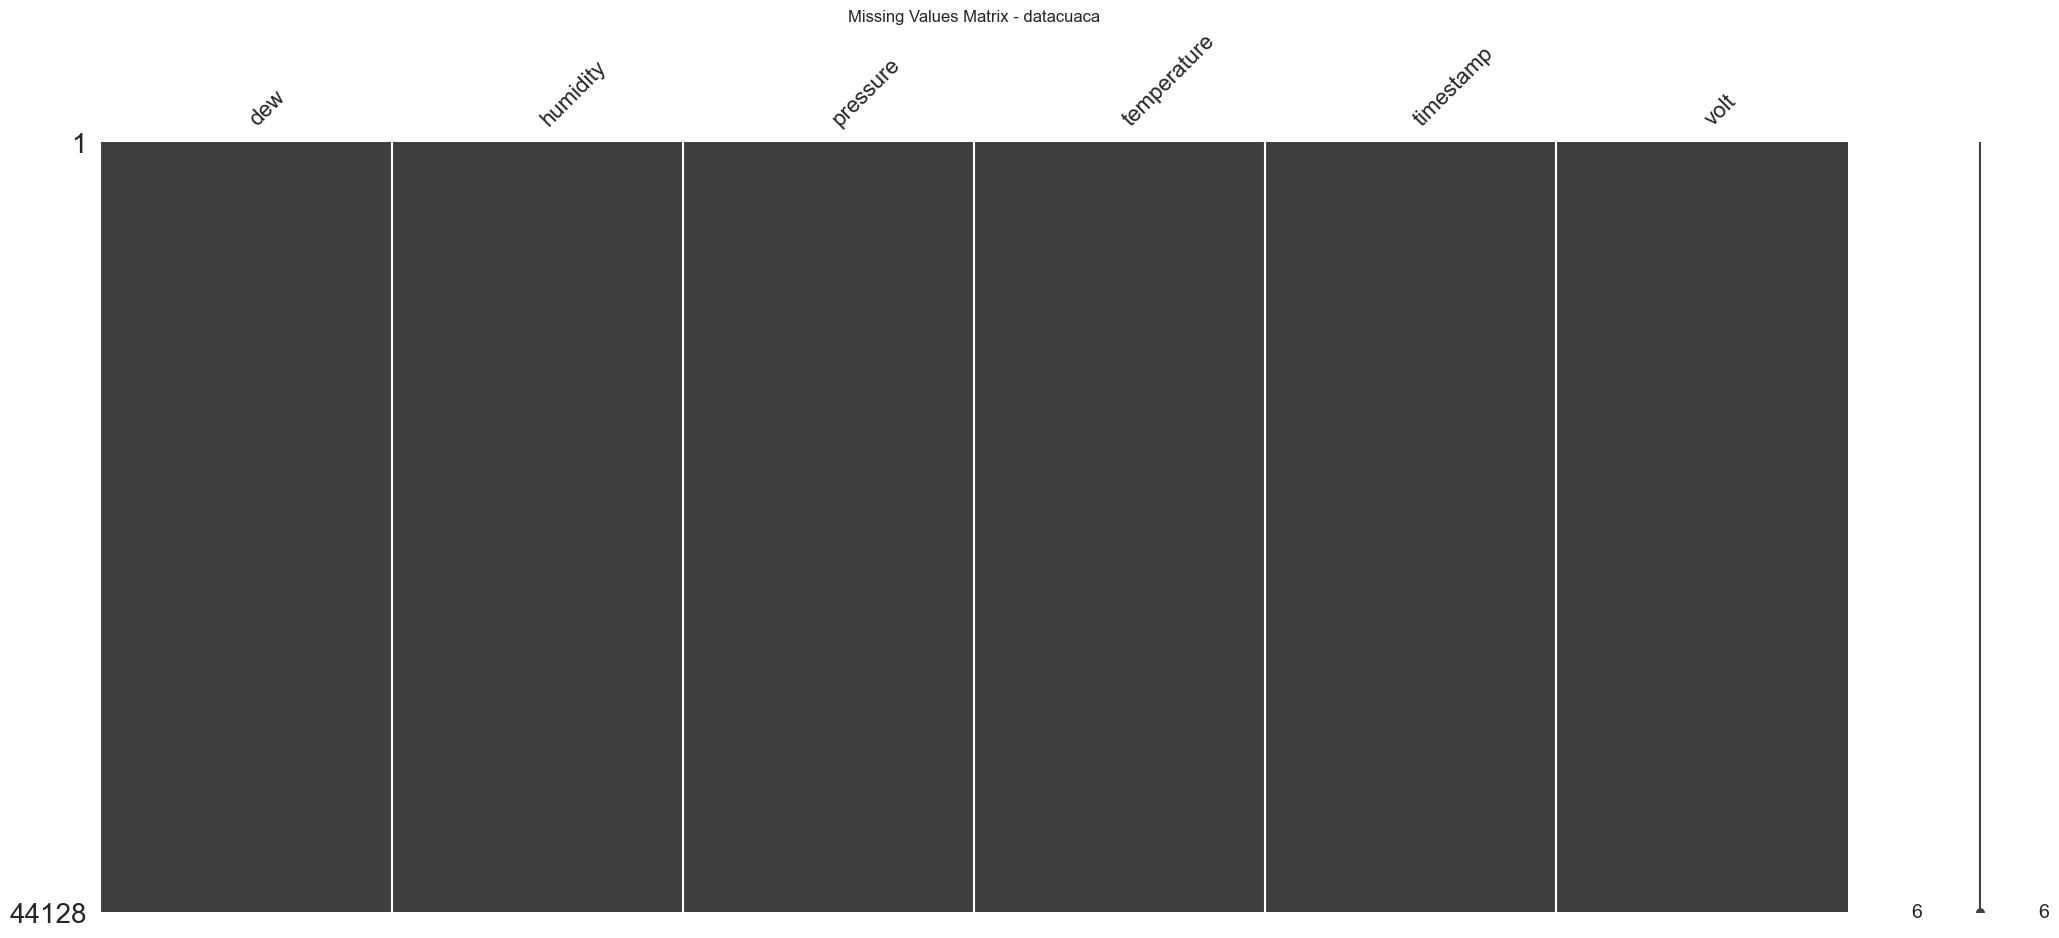

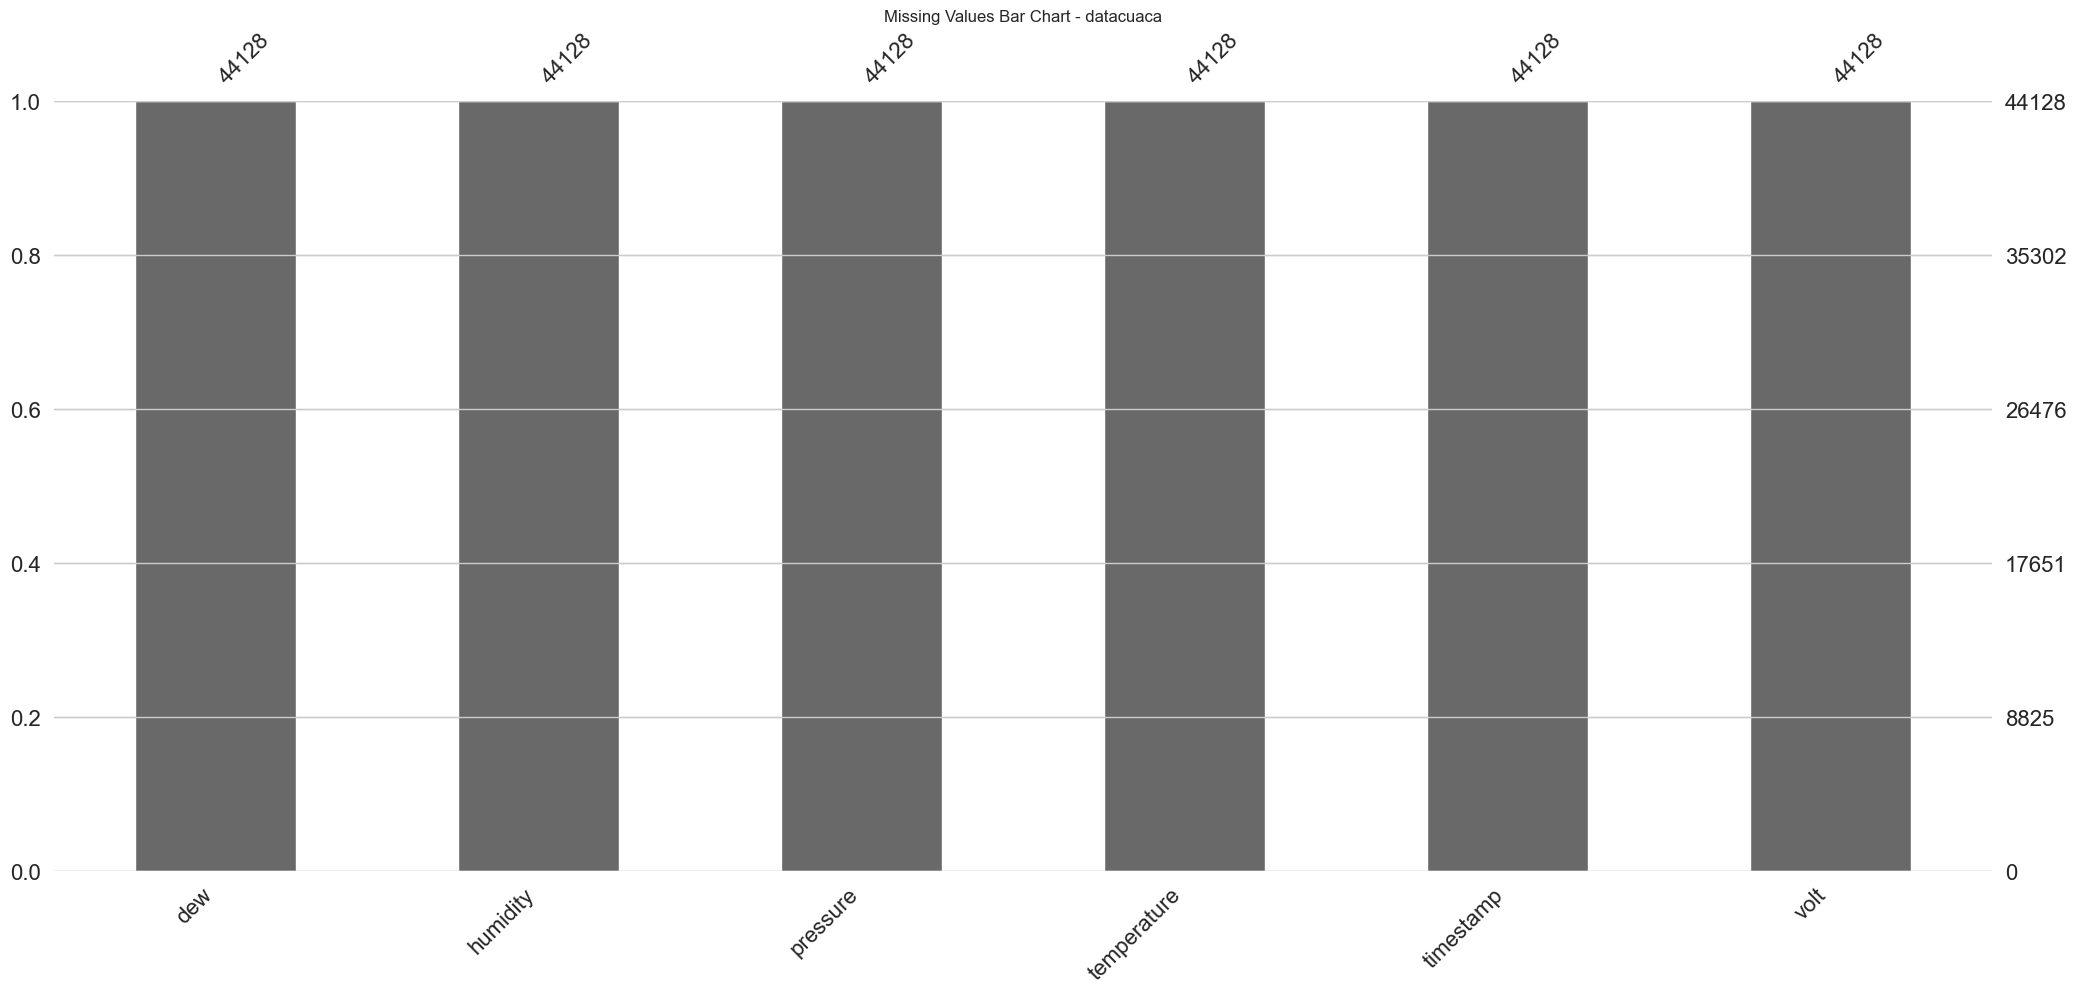

d:\conda_env\tensorflow\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
d:\conda_env\tensorflow\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


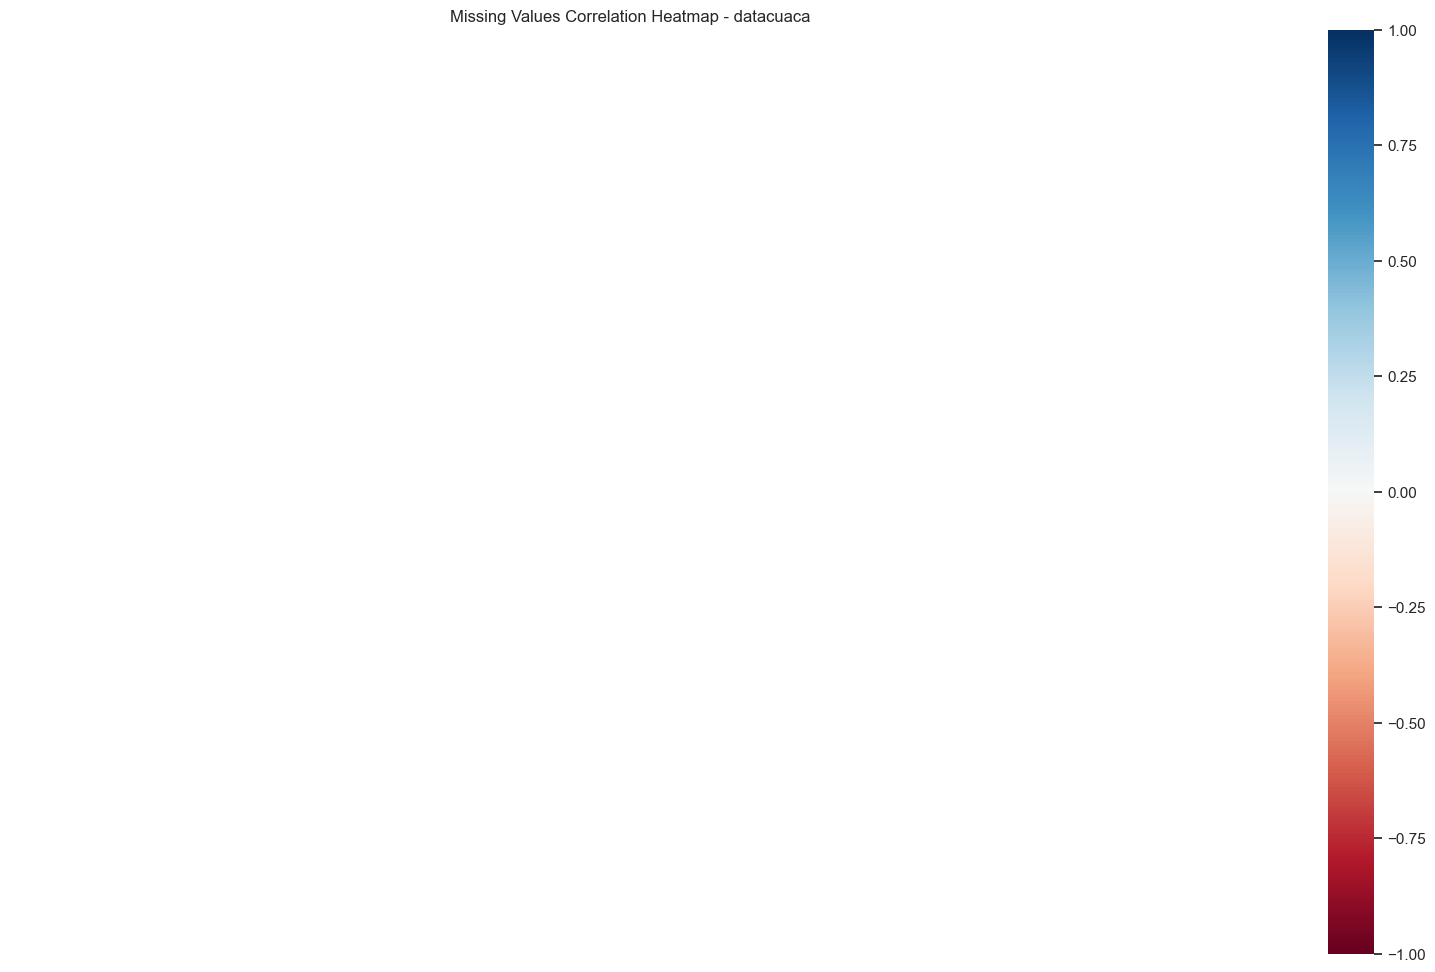

Visualisasi missing values untuk datacuaca2:


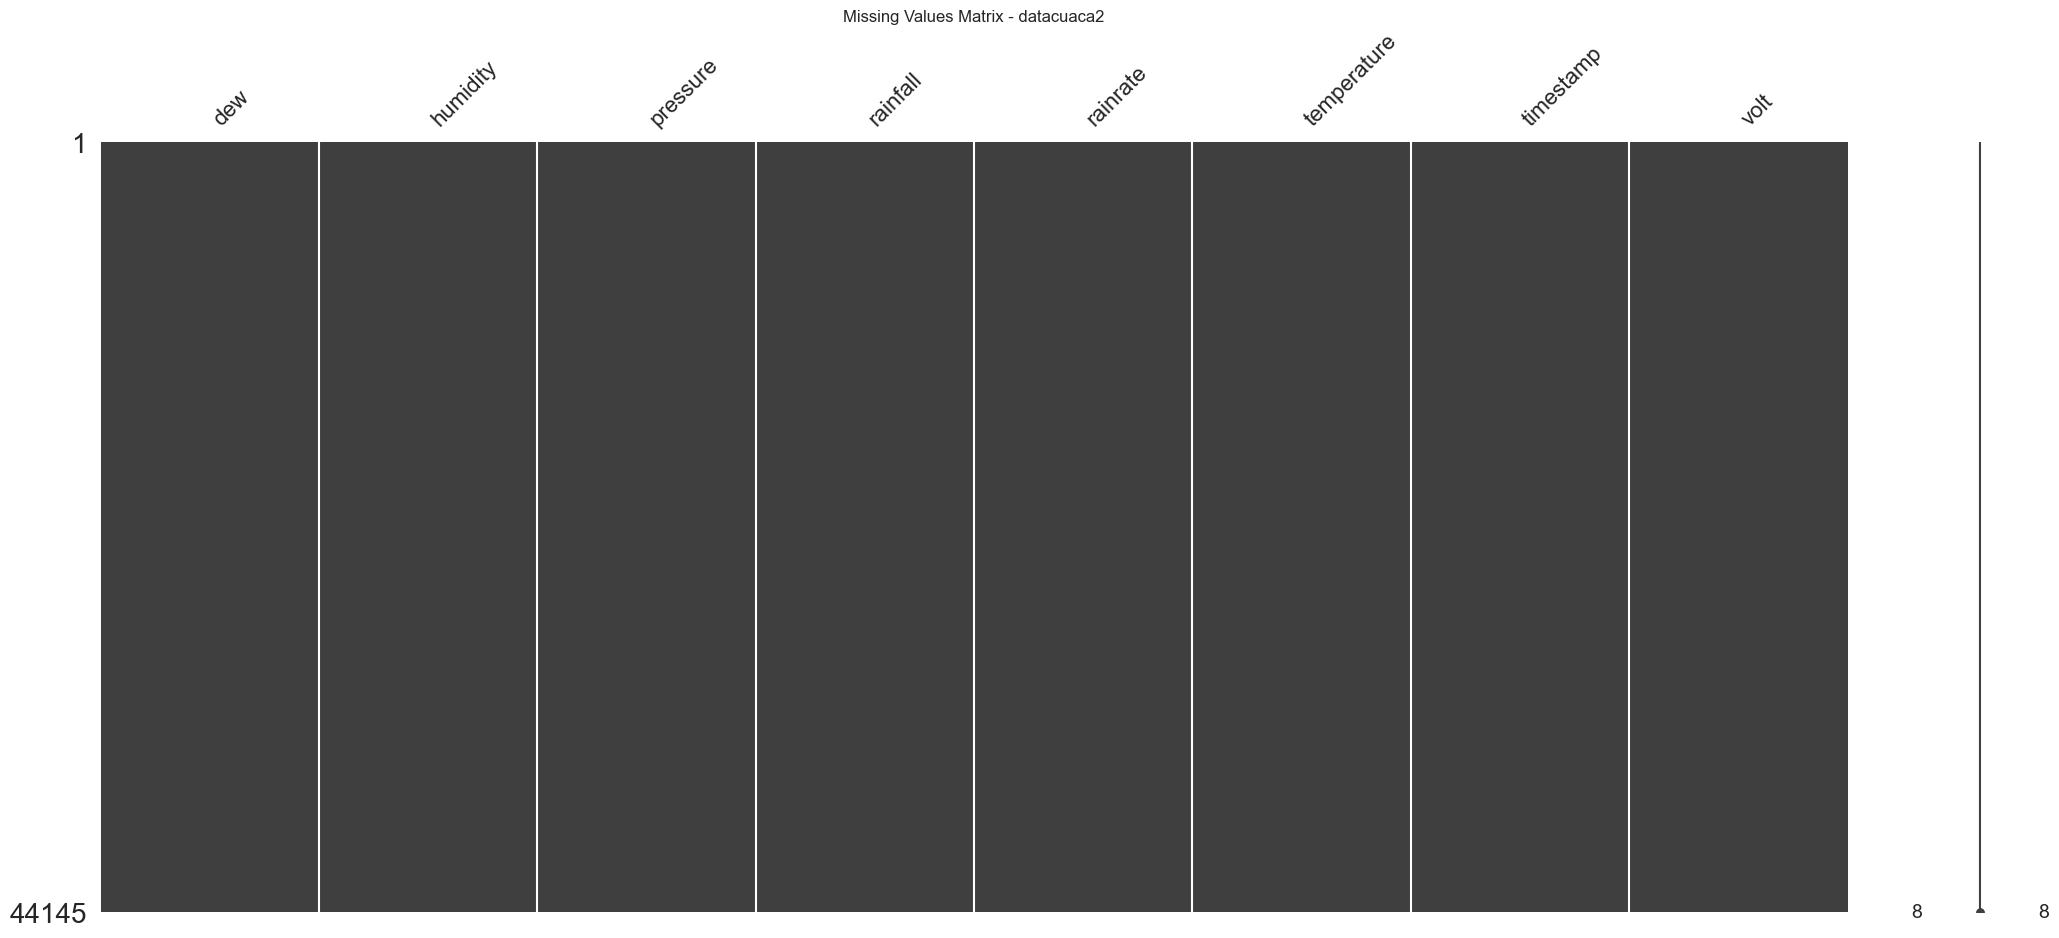

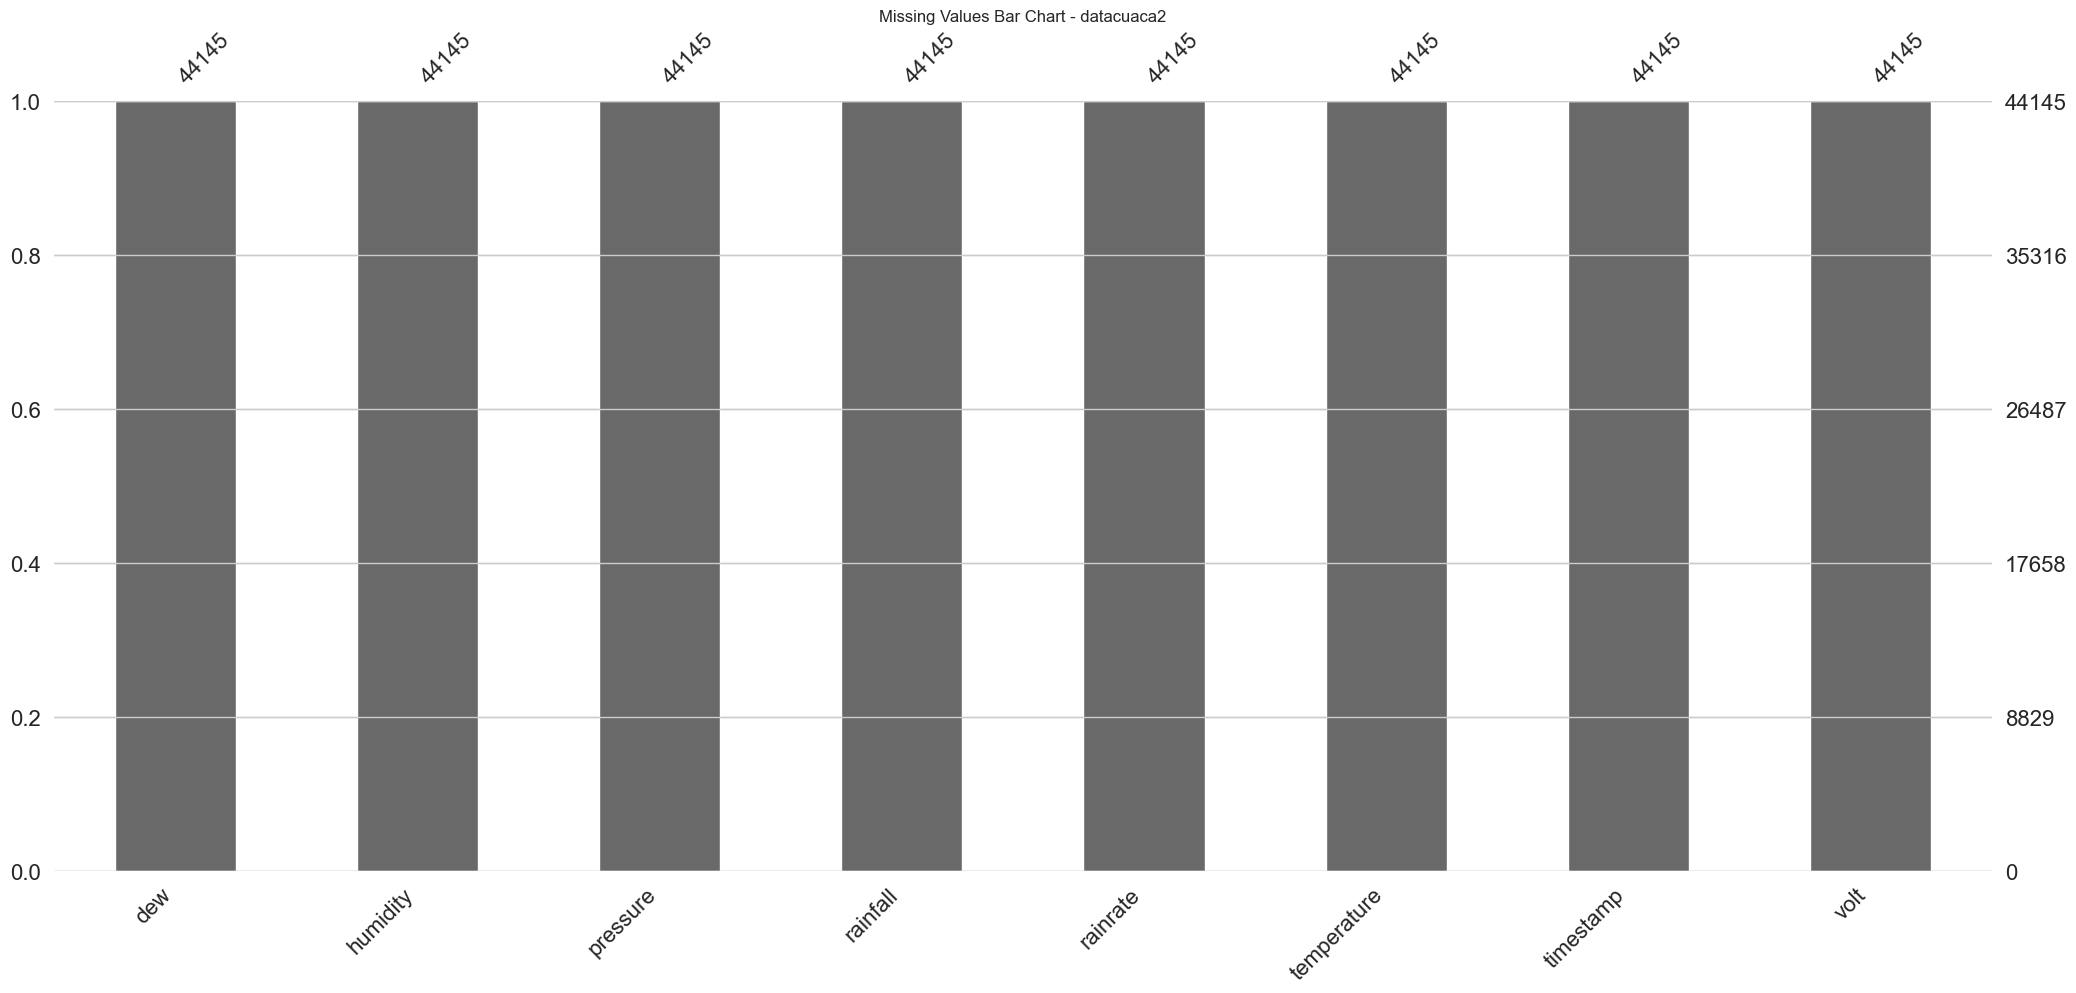

d:\conda_env\tensorflow\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
d:\conda_env\tensorflow\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


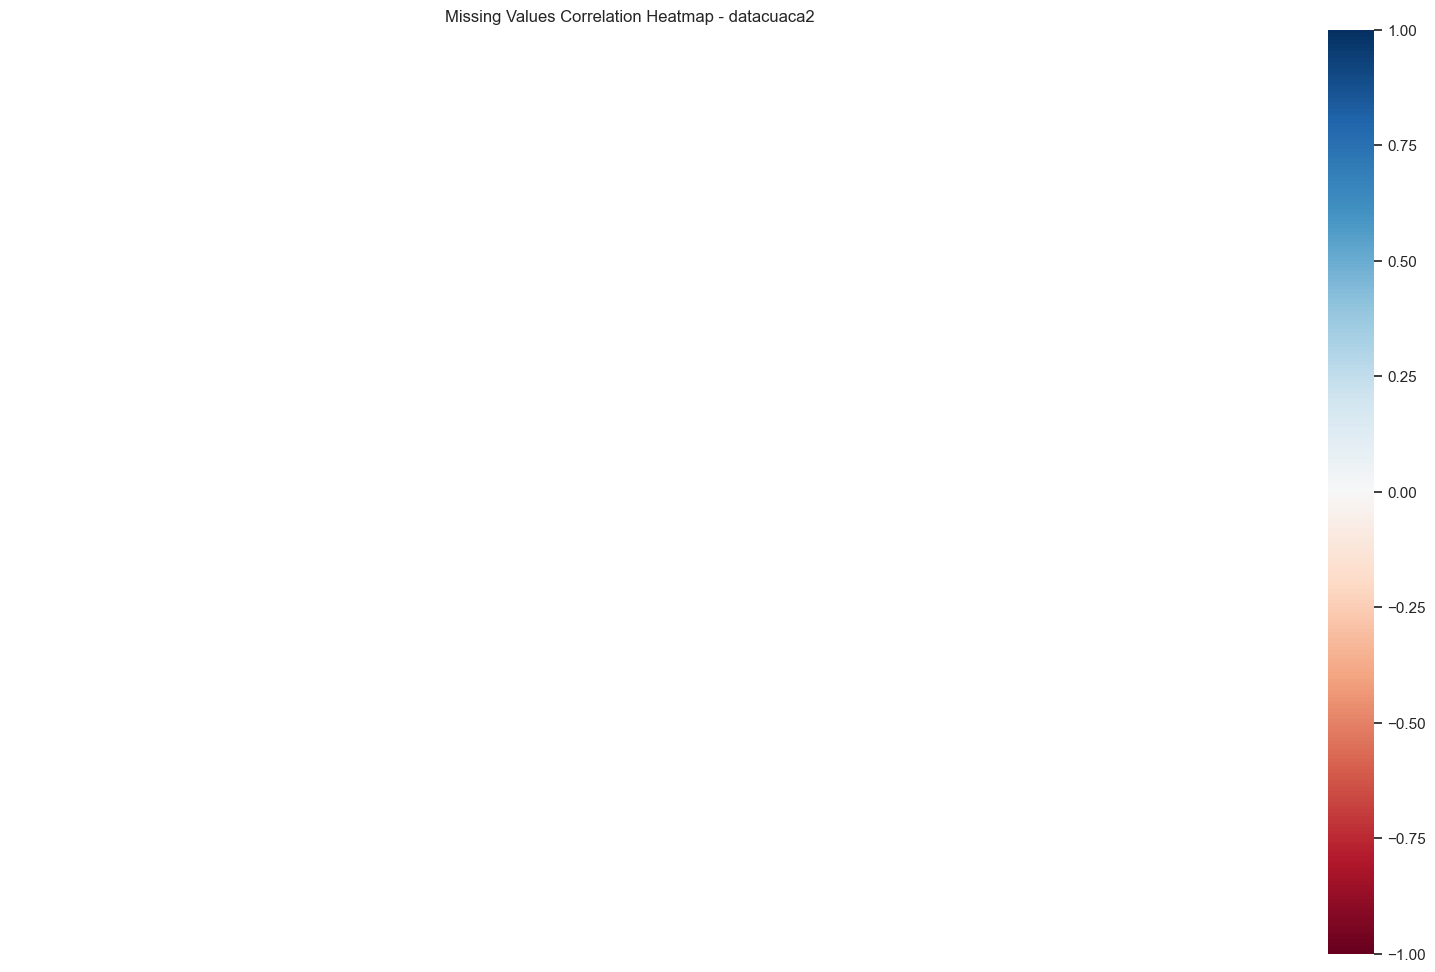

Ringkasan missing values untuk datacuaca:
dew            0
humidity       0
pressure       0
temperature    0
timestamp      0
volt           0
dtype: int64

Ringkasan missing values untuk datacuaca2:
dew            0
humidity       0
pressure       0
rainfall       0
rainrate       0
temperature    0
timestamp      0
volt           0
dtype: int64


In [28]:
# Visualisasi missing values untuk datacuaca
print("Visualisasi missing values untuk datacuaca:")
msno.matrix(datacuaca)
plt.title("Missing Values Matrix - datacuaca")
plt.show()

msno.bar(datacuaca)
plt.title("Missing Values Bar Chart - datacuaca")
plt.show()

msno.heatmap(datacuaca)
plt.title("Missing Values Correlation Heatmap - datacuaca")
plt.show()

# Visualisasi missing values untuk datacuaca2
print("Visualisasi missing values untuk datacuaca2:")
msno.matrix(datacuaca2)
plt.title("Missing Values Matrix - datacuaca2")
plt.show()

msno.bar(datacuaca2)
plt.title("Missing Values Bar Chart - datacuaca2")
plt.show()

msno.heatmap(datacuaca2)
plt.title("Missing Values Correlation Heatmap - datacuaca2")
plt.show()

# Menampilkan ringkasan missing values
print("Ringkasan missing values untuk datacuaca:")
print(datacuaca.isnull().sum())

print("\nRingkasan missing values untuk datacuaca2:")
print(datacuaca2.isnull().sum())

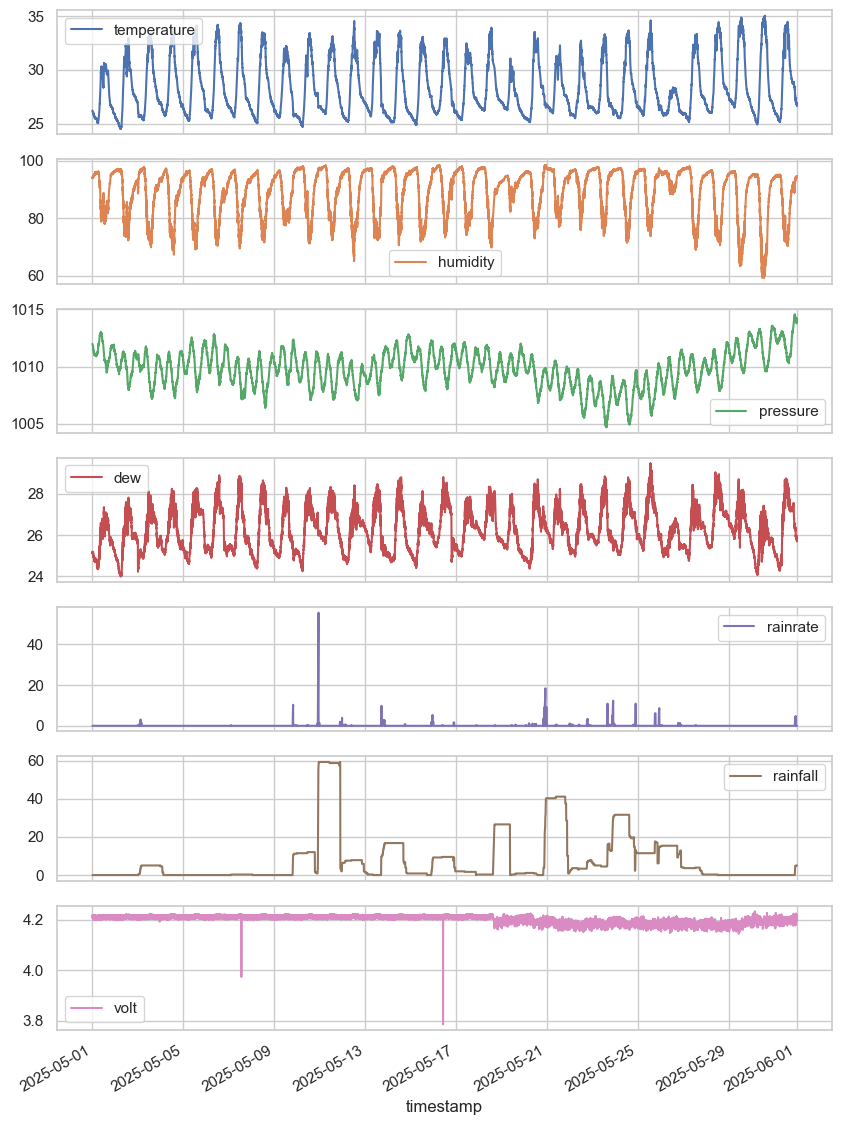

In [29]:
datacuaca2.plot(
    y=[
    'temperature', 
    'humidity', 
    'pressure', 
    'dew',
    'rainrate',
    'rainfall',
    'volt'
    ],
    x='timestamp',
    subplots=True, figsize=(10, 15))
plt.show()

In [30]:
# Mengubah kolom 'timestamp' menjadi datetime
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Mengurutkan data berdasarkan 'timestamp'
datacuaca = datacuaca.sort_values(by='timestamp')

# Menambahkan kolom 'hour', 'minute', 'day', 'month', dan 'year' dari 'timestamp'
datacuaca['hour'] = datacuaca['timestamp'].dt.hour
datacuaca['minute'] = datacuaca['timestamp'].dt.minute
datacuaca['day'] = datacuaca['timestamp'].dt.day
datacuaca['week'] = datacuaca['timestamp'].dt.isocalendar().week
datacuaca['month'] = datacuaca['timestamp'].dt.month
datacuaca['year'] = datacuaca['timestamp'].dt.year

In [31]:
# Mengubah kolom 'timestamp' menjadi datetime
datacuaca2['timestamp'] = pd.to_datetime(datacuaca2['timestamp'])

# Mengurutkan data berdasarkan 'timestamp'
datacuaca2 = datacuaca2.sort_values(by='timestamp')

# Menambahkan kolom 'hour', 'minute', 'day', 'month', dan 'year' dari 'timestamp'
datacuaca2['hour'] = datacuaca2['timestamp'].dt.hour
datacuaca2['minute'] = datacuaca2['timestamp'].dt.minute
datacuaca2['day'] = datacuaca2['timestamp'].dt.day
datacuaca2['week'] = datacuaca2['timestamp'].dt.isocalendar().week
datacuaca2['month'] = datacuaca2['timestamp'].dt.month
datacuaca2['year'] = datacuaca2['timestamp'].dt.year

In [32]:
# Ekspor datacuaca2 ke CSV dengan delimiter titik koma (;)
datacuaca2.to_csv('datacuacaMei.csv', sep=',', index=False)
print("DataFrame datacuaca2 berhasil diekspor")

DataFrame datacuaca2 berhasil diekspor
